Student Name:
Student Reg#: 

In [5]:
import chime
chime.notify_exceptions()

# Deep Learning 2024

In this notebook
- The end-to-end crash course of DL is explained as coding.

Classroom code: 
- o64a7np

Notebook Authors:
- Eng. Ahmed Métwalli
- Eng. Alia Elhefny

## Environment Preparation:
- Download anaconda: https://www.anaconda.com/download/success
- Create a new environment called 'DL_SEPT_2024'
    - Set Python version 3.11.x
    - Install:
        - Notebook
        - JupyterLab
        - VS Code
        - CMD Prompt
        - Powershell Prompt
    - In Python install basic packages (pip install `package`):
        - pandas
        - numpy
        - matplotlib
        - seaborn
        - tensorflow
        - keras
        - sklearn
        - chime

## Section 1

In our traditional Data Science Lifecycle, the main change we have over the course is within the Data Modelling block, where the algorithm used is neural network related, instead of Machine Learning methods.

<img src = "DS!.png">

### Mathematical Model of the Perceptron
A perceptron a.k.a (Linear Binary Classifier) is a linear classifier that makes decisions based on a linear function. The mathematical model can be represented as follows:

1. **Linear Combination:**
   $$
   z = \mathbf{W} \cdot \mathbf{X} + b
   $$
   - **W**: Weight vector.
   - **X**: Input feature vector.
   - **b**: Bias term.

2. **Activation Function:**
   $$
   y = \text{step}(z)
   $$
   - The step function is a threshold function that outputs 1 if z >= 0 and 0 otherwise.

3. **Perceptron Learning Rule:**
   The perceptron adjusts its weights and bias to minimize the classification error using the following rule:
   $$
   \Delta \mathbf{W} = \eta \cdot (y_{\text{true}} - y_{\text{pred}}) \cdot \mathbf{X}
   $$
   $$
   \Delta b = \eta \cdot (y_{\text{true}} - y_{\text{pred}})
   $$
   - **eta**: Learning rate.
   - **y_true**: True label of the data point.
   - **y_pred**: Predicted label by the perceptron.

### Steps to Build the Perceptron Class

1. **Initialization:**
   - Define a class `Perceptron` with attributes for the learning rate, number of iterations, weights, and bias.
   - Initialize the weights and bias to zero.

2. **Training (`fit` Method):**
   - For each training example, compute the linear combination `z`.
   - Apply the activation function to determine the predicted output `y`.
   - Update the weights and bias using the perceptron learning rule.

3. **Prediction (`predict` Method):**
   - Compute the linear combination `z` for given input features.
   - Apply the activation function to predict the output.

This unit is called Perceptron

<img src = "Perceptron.gif">

### Objective of the Code

- **Train the Perceptron** to solve logical operations such as OR, AND, and XOR.
- **Visualize Decision Boundaries** to understand how the perceptron separates data points.
- **Highlight Limitations** by demonstrating that the perceptron fails to solve non-linearly separable problems like XOR.

### Key Takeaways [HINTS]
- The perceptron is effective for linearly separable data.
- For complex datasets, more sophisticated models like Multi-Layer Perceptrons are required.


In [ ]:
import numpy as np, pandas as pd # Data manipulation libraries
import matplotlib.pyplot as plt # Data visualization

# Creation of the perceptron class including all important methods
class Perceptron:
    def __init__(self, learning_rate= ..., n_iters= ...):
        
        self.learning_rate = ...
        self.n_iters = ...
        self.activation_func = ... 
        self.weights = ...
        self.bias = ...
        self.log = pd.DataFrame(columns=["Iteration", "Weights", "Bias", "Actual", "Predicted"]) # DF for logging purposes.

    def _sigmoid_function(self, x): # fill in the code
        return ...
    
    def fit(self, X, y):
        n_samples, n_features = X.shape # returns the number of samples (rows) and features (columns).
        self.weights = ...
        self.bias = ...
        self._log(0, X, y) # Logging initial weights and bias as 0
        # Gradient descent algorithm
        for iteration in range(1, self.n_iters + 1): #The outer loop runs for the number of iterations (self.n_iters).
            for idx, x_i in enumerate(X): #The inner loop iterates over each sample x_i in the dataset X.
                linear_output = ... # Calc. the linear combination of weights and features plus bias.
                y_predicted = self.activation_func(...) #Apply activation func.
                # Perceptron learning rule update
                update = ... # Update rule
                self.weights += update * x_i # Equation applied
                self.bias += update
            # Logger operation
            self._log(iteration, X,y ) # Logging weights, bias, and predictions at each iteration

    def _log(self, iteration, X, y):
        """Log the weights and bias for each iteration."""
        y_predicted = self.predict(X) # Calculate predictions for the current weights and bias
        log_entry = pd.DataFrame({
            "Iteration": [iteration] * len(X), # Repeating the current iteration for each data point
            "Weights": [self.weights.copy()], # Because weights are stored in array-like so that are mutable 
            "Bias": [self.bias], # Bias is scalar immutable therefore no copy operation added
            "Actual": y, # Log the actual output
            "Predicted": y_predicted # Log the predicted output
        })
        self.log = pd.concat([self.log, log_entry], ignore_index=True)

    def predict(self, X):
        """This function uses the trained weights and bias to predict labels for input data X."""
        linear_output = ...
        y_predicted = self.activation_func(...)
        return ...

# Utility class for dataset creation and visualization
class Utility: #Utility programming-wise covers 
    @staticmethod #Static method unlike classes with init, it doesn't need to access 'self'
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  #X[:, 0] and X[:, 1] represent the two features in the dataset X.
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # (+ or - 1) extends the plotting area slightly beyond the points
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), # Helps us to generate the coordinates data from individual arrays
                            np.arange(y_min, y_max, 0.01)) # and visualize the decision boundary
        # generates values from x_min to x_max with a step of 0.01. This creates a fine grid for smooth plotting.
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # Ravel flattens the 2d arrays
        Z = Z.reshape(xx.shape) # Z is reshaped back into a 2D same shape as xx and yy for plotting the decision boundary.
        plt.contourf(xx, yy, Z, alpha=0.8) # alpha=0.8 parameter controls the transparency of the contour plot.
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50) # X, y, color, bordercolor, marker, markersize
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
        
    @staticmethod
    def create_logical_dataset(logical_operator):
        if logical_operator == 'OR':
            X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            y = np.array([0, 1, 1, 1])
        elif logical_operator == 'AND':
            X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            y = np.array([0, 0, 0, 1])
        elif logical_operator == 'XOR':
            X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            y = np.array([0, 1, 1, 0])
        else:
            raise ValueError("Unknown logical operator!")
        
        # Create a pandas DataFrame for better visualization
        df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
        df["Label"] = y
        display(df)
        return X, y

# Helper function to train and visualize the perceptron on a given dataset
class Helper: #Helper generally focused on performing small, specific series of operations (Handling scenarios)
    @staticmethod
    def train_and_visualize(logical_operator):
        X, y = Utility.create_logical_dataset(logical_operator)
        perceptron = Perceptron(learning_rate=0.1, n_iters=10)
        perceptron.fit(X, y)
        Utility.plot_decision_boundary(X, y, perceptron, f'{logical_operator} Perceptron Decision Boundary')
        
        # Display the weights and bias log in a DataFrame
        display(perceptron.log)

# OR Problem
print("Training Perceptron on OR dataset...")
Helper.train_and_visualize('OR')

# AND Problem
print("Training Perceptron on AND dataset...")
Helper.train_and_visualize('AND')

# XOR Problem
print("Training Perceptron on XOR dataset (expected to fail)...")
Helper.train_and_visualize('XOR')


### Conclusion: 
- The perceptron model works perfectly for linearly separable data such as OR and AND, but fails to solve the XOR problem due to its linear decision boundary.
- For non-linearly separable data, we need to use more advanced models like Multi-Layer Perceptrons.

### Some Terminologies!!:
DL:
- Epoch: One complete pass through the entire training dataset. This involves processing every sample in the dataset once.
- Iteration: In this code, an iteration refers to a single update of the model's parameters. Here, the number of iterations is set to the number of epochs, as each epoch updates the model for every sample in the dataset.

Programming:
- Utility: Utilities are typically more general-purpose and can be applied in a variety of contexts. They may include operations like file handling, data transformation, or mathematical calculations.
- Helper: Helpers are typically more narrowly scoped to support a specific part of an application or module. For example, a "helper" might be used to handle string formatting, validate inputs, or perform a small, repetitive task.

### Classwork 1: Solving the XOR Problem with a Multi-Layer Perceptron Using Keras

#### Objective:
- Implement a Multi-Layer Perceptron (MLP) using Keras to solve the XOR problem.
- Understand how to use high-level deep learning libraries for building, training, and evaluating neural networks.

#### Steps to Complete the Assignment:

#### Hints
```python
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create the XOR inputs and outputs
X = np.array(...)
y = np.array(...)
# Build the model
model = Sequential()
model.add(Dense(...))
model.add(Dense(...))
# Compile the model
model.compile(loss='...', optimizer='...', metrics=['accuracy'])
# Train the model
model.fit(..., ..., epochs=...)
# Evaluate the model
loss, accuracy = model.evaluate(...)
print(f'Accuracy: {accuracy*100:.2f}%')



## Section 2: Multilayer Perceptron

- MLP is a type of artificial neural network used for supervised learning tasks, such as classification and regression.
- It consists of:
    - multiple layers of interconnected neurons:
        - including an input layer
        - one or more hidden layers, 
        - and an output layer.
    - activation functions
- Common activation functions for hidden layers include:
    - ReLU (Rectified Linear Unit)
    - sigmoid, 
    while the output layer's activation function depends on the problem type e.g. softmax for classification 
- Once your model is defined, you compile it with a loss function, an optimizer, and evaluation metrics. This configuration depends on the specific problem you're solving.
- Training an MLP involves feeding the training data through the network, computing gradients, and updating the model's weights using backpropagation and gradient descent algorithms.
- Python libraries offer built-in training loops or tools to facilitate the training process.
- You should split your dataset into training, validation, and test sets to evaluate your model's performance accurately.
- Monitoring training progress and visualizing results are essential steps.
- After training, you can save your model's weights and architecture for later use and deployment.


<img src="Pytorch_vs_Tensorflow.PNG" alt="Alternative text" />

### MLP on Iris Dataset

In this section we build an end to end data modelling for the iris dataset which is used for research/academic purposes in python builtin libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # This is the dataset itself
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Standardization
from keras.models import Sequential # For adding layers
from keras.layers import Dense # MLP
from keras.utils import to_categorical # For output reshaping
import matplotlib.pyplot as plt

#### Inspecting Data

In [ ]:
iris = ... # Load the Iris dataset using .load()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
... # seeing the keys of the Iris Data using .keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
for key in iris.keys():
    if (iris[key] is not None):
        print(..., ...) # Display the key and the length of that key

data 150
target 150
target_names 3
DESCR 2780
feature_names 4
filename 8
data_module 21


In [ ]:
# Create a dataframe to include the iris "data" (Given that the length and columns are shown in previous cell)
df = pd.DataFrame(data=iris[...],columns=...) # Feature names?
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
# Map the classes of target names (Hint: see the target names and the target values to map them)
class_mapping = {\
    ...:iris['target_names'][0],
    1:..., 
    2:iris['target_names'][2]
    }

In [ ]:
df['target'] = iris['target'] # add the target y to the dataframe
df['target_decoded'] = df[...].map(...) # Use the class mapping you just made with the .map func.

In [ ]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_decoded
141,6.9,3.1,5.1,2.3,2,virginica
30,4.8,3.1,1.6,0.2,0,setosa
90,5.5,2.6,4.4,1.2,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor
67,5.8,2.7,4.1,1.0,1,versicolor


#### Visualize some data

In [ ]:

class Utility:
    @staticmethod
    def scatter_features(feature_1,feature_2):
        # Plot the data for each class separately
        for target_class in df['target'].unique():
            subset = df[df['target'] == target_class]
            plt.scatter(subset[feature_1], subset[feature_2], 
                        label=class_mapping[target_class])

        # Add labels, title, and legend
        plt.xlabel('Petal Length (cm)')
        plt.ylabel('Petal Width (cm)')
        plt.title('Iris Dataset - True Classes')
        plt.legend(title='Classes')
        plt.show()

#### Data Modelling

In [ ]:
@staticmethod
def split_and_scale_data(df,test_size=0.2):
    X = df[[column for column in df.columns if column not in ['target','target_decoded']]]
    y = to_categorical(df['target'])
    # Split the data into training and testing sets
    X_train, ..., ..., y_test = ... #Split data using train test split
    print('Data is split successfully')
    scaler = ... #Use the standardscaler
    X_train = ... # use the scaler method "fit_transform"
    X_test = ... # same here
    print('Data is scaled successfully')
    return ..., ..., ..., ...
@staticmethod
def model_creation(input_dim,hidden_layer_dim,output_dim):
    model = ... # use sequential
    model.add(Dense(..., ..., activation='relu'))  # Hidden layer (including dimension of input)
    model.add(Dense(..., activation='softmax'))  # Output layer
    print('Model created successfully')
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print('Model compiled successfully')
    return model
@staticmethod
def model_fit_evaluate(model,X_train,X_test,y_train,y_test,epochs,batch_size,verbose = 1):
    ... # Use fit the model
    print('Model is fit successfully')
    loss, accuracy = ... # Evaluate the model
    print('Model is evaluated as follows:')
    print(f'Test accuracy: {accuracy * 100:.2f}%')

Utility.split_and_scale_data = split_and_scale_data
Utility.model_creation = model_creation
Utility.model_fit_evaluate = model_fit_evaluate

In [ ]:
class Helper:
    @staticmethod
    def run_pipeline(df = df, input_dim = 4, hidden_layer_dim = 10, output_dim = 3, epochs = 100, batch_size=8,verbose = 0):
        Utility.scatter_features(feature_1='petal length (cm)',feature_2='petal width (cm)')
        Utility.scatter_features(feature_1='sepal length (cm)',feature_2='sepal width (cm)')
        X_train, X_test, y_train, y_test = ... # use your utilities
        model = ... # use ur utilities
        print(...) # print the summary of the model
        Utility.model_fit_evaluate(...,...,...,...,...,...,...,...)

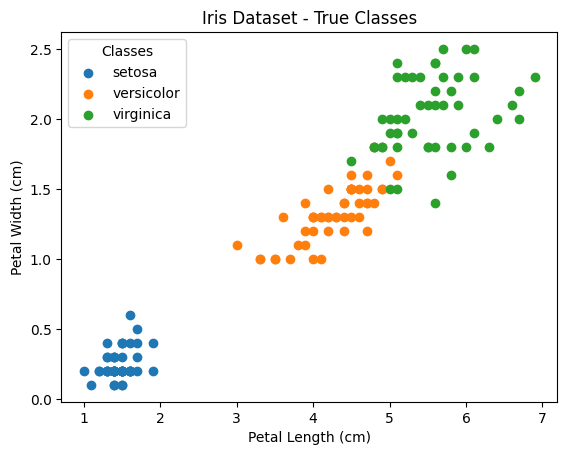

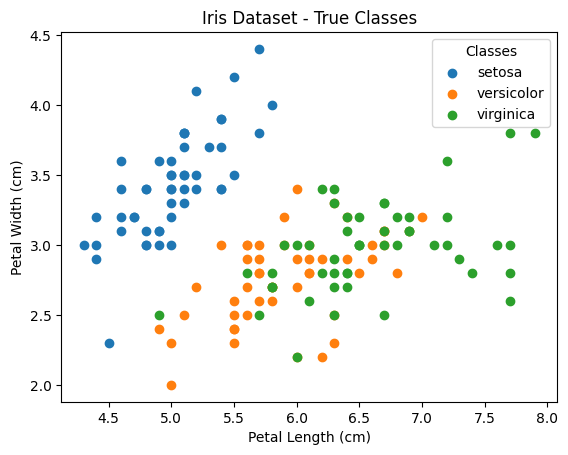

Data is split successfully
Data is scaled successfully
Model created successfully
Model compiled successfully
Model is fit successfully
2/2 [==============================] - 0s 8ms/step - loss: 0.1134 - accuracy: 0.9778
Model is evaluated as follows:
Test accuracy: 97.78%


In [ ]:
Helper.run_pipeline()

##### Key terms:
Epochs: Number of complete passes through the entire training dataset. More epochs help the model learn, refining weights after each pass. Mathematically, this can be expressed as:

$$ \text{Epochs} = \frac{\text{Total Samples}}{\text{Batch Size}} $$

Where:
- **Total Samples** is the total number of examples in the dataset.
- **Batch Size** is the number of examples processed in one batch.

---

**Batch Size**: The number of samples processed before updating the model’s weights. Smaller batch sizes update the weights more frequently, while larger batch sizes stabilize the training process. In mathematical terms:

$$ \text{Batch Size} = \frac{\text{Total Samples}}{\text{Number of Batches}} $$

Where:
- **Total Samples** is the number of examples in the dataset.
- **Number of Batches** is the total number of batches used during training.

---

**Backpropagation**: The process of adjusting model weights by computing the gradient of the loss function with respect to each weight. It consists of a forward pass and a backward pass to adjust the weights:

$$ \Delta w = -\eta \frac{\partial L}{\partial w} $$

Where:
- Delta w is the weight update.
- eta is the learning rate.
- {partial L}/{partial w} is the gradient of the loss function \( L \) with respect to weight \( w \).

---

**Crossentropy** (Loss Function): Measures the difference between true labels and predicted probabilities. Categorical crossentropy is used for multi-class classification, minimizing the error between predicted and actual classes. Categorical crossentropy is calculated as:

$$ L = -\sum_{i=1}^{N} y_i \log(\hat{y}_i) $$

Where:
- L is the loss value.
- N is the number of classes.
- y_i is the true label (1 for correct class, 0 for others).
- y_hat_i is the predicted probability for class \( i \).

---

**Model Compilation**: Specifies the loss function, the optimizer, and metrics. This step tells the model how to learn and evaluate itself. For example, using categorical crossentropy and the Adam optimizer:

$$ \text{Loss} = \text{categorical\_crossentropy}, \quad \text{Optimizer} = \text{Adam}, \quad \text{Metrics} = \text{accuracy} $$

Where:
- **Loss** is the objective function used to minimize the error.
- **Optimizer** is the algorithm used to update the model’s weights.
- **Metrics** are used to evaluate the performance (like accuracy).

---

**Adam optimizer**: (short for Adaptive Moment Estimation) is an optimization algorithm used to adjust model weights during training. It combines the advantages of two popular optimizers:

- **Momentum**: Helps accelerate gradient descent by using an exponentially weighted average of past gradients. The updates to the weights use these equations:
$$ v_t = \beta v_{t-1} + (1 - \beta) \nabla L_t $$

            Where:
            - v_t is the velocity at time step t.
            - beta is the momentum coefficient (typically 0.9).
            - nabla L_t is the gradient of the loss function at time step t .


- **RMSProp**: Adjusts the learning rate for each parameter based on recent gradients. Given the follwing equation:
$$ s_t = \beta_2 s_{t-1} + (1 - \beta_2) (\nabla L_t)^2 $$

            Where:
            - s_t is the moving average of the squared gradient at time step t.
            - beta_2 is the RMSProp decay rate (typically 0.999).


- In short, Adam is efficient, requires little memory, and adapts the learning rate during training. 
---


 **StandardScaler**: A preprocessing technique that standardizes the features by removing the mean and scaling them to unit variance. It's important to use StandardScaler when features have different scales, as it ensures that each feature contributes equally to the model's performance. Without scaling, features with larger values may dominate those with smaller values, skewing the results.
 $$ X_{\text{scaled}} = \frac{X - \mu}{\sigma} $$

Where:
-  X  is the original feature value.
- mu is the mean of the feature.
- sigma is the standard deviation of the feature.
- X_scaled is the scaled value after standardization.

**Batch Normalization**: A technique to improve training speed, performance, and stability of neural networks by normalizing the inputs to each layer. It helps by maintaining the mean and variance of activations stable during training.

The formula for batch normalization is:

$$ \hat{x}^{(k)} = \frac{x^{(k)} - \mu_B^{(k)}}{\sqrt{\sigma_B^{(k)2} + \epsilon}} $$

Where:
- \( x^{(k)} \) is the \( k \)-th feature in the input batch.
- \( \mu_B^{(k)} \) is the mean of the \( k \)-th feature in the batch.
- \( \sigma_B^{(k)2} \) is the variance of the \( k \)-th feature in the batch.
- \( \epsilon \) is a small constant added for numerical stability.
- \( \hat{x}^{(k)} \) is the normalized value of the feature.

After normalization, a scale (\( \gamma \)) and shift (\( \beta \)) operation is typically applied:

$$ y^{(k)} = \gamma^{(k)} \hat{x}^{(k)} + \beta^{(k)} $$

Where:
- \( \gamma^{(k)} \) is the scaling factor.
- \( \beta^{(k)} \) is the shifting factor.
- \( y^{(k)} \) is the output after applying batch normalization.



## Assignment 2: 
1. After finishing the previous cells and solving them, display the data after performing standard scaler.
2. Implement the previous whole model using PyTorch instead of keras and tensorflow (Personal search) and add another hidden layer so you have 2 hidden layers. Apply Batch Normalization.
 

## Section 3: Activation Functions, Batch Normalization and Regularization 

### Activation Functions

Activation functions are mathematical equations that determine the output of neural networks. They basically decide to deactivate neurons or activate them to get the desired output thus the name, activation functions.

<img src = 'Screenshots\8.webp'>

#### Binary Step Function

- Binary step function is a threshold-based activation function.
- It activates the neuron above a certain threshold and deactivates it below that threshold.
- The threshold for the below graph is set at zero.
- This activation function is suitable for binary classifications.
- It cannot be used for scenarios with multiple classes to classify.

<img src = 'Screenshots\1.webp'>

#### Linear Activation Function

- In the Linear Activation function, the output is directly proportional to the weighted sum of neurons.
- Linear Activation function can handle multiple classes, unlike Binary Step function.
- However, it has drawbacks in back-propagation, where changes made are constant, hampering learning.
- Another significant drawback is that regardless of the depth of the neural network, the last layer will always be a function of the first layer.( During backpropagation, the derivative remains constant, leading to less efficient learning compared to non-linear activation functions with varying gradients.)


<img src = 'Screenshots\2.webp'>

#### Non-Linear Activation Functions

Deep learning practitioners deal with high-dimensional data, such as images, audios, videos, etc. Due to the limitations of Linear Activation Functions mentioned earlier, they are not practical for complex applications. Therefore, Non-Linear Activation Functions are widely used today. These functions enable neural networks to effectively handle complex relationships in the data. In the following sections, we will explore some popular non-linear activation functions.

#### Sigmoid function

- The Sigmoid function (logistic function) maps inputs to an output range between 0 and 1, making it useful for probabilistic interpretations and binary classification tasks.
- It normalizes the output of each neuron, representing the probability of a particular event occurring.
- The vanishing gradient problem occurs with the Sigmoid function when inputs are very high or very low, causing the function's gradient to become extremely small.
- The vanishing gradient problem leads to slow learning as the network makes minor weight adjustments during backpropagation.

<img src = 'Screenshots\3.webp'>

#### tanh function

tanh function (also known as hyperbolic tangent) is almost like the sigmoid function but slightly better than that since it’s output ranges between -1 and 1 allowing negative outputs. 
- However, tanh also comes with the vanishing gradient problem just like sigmoid function.

<img src = 'Screenshots\4.webp'>

#### ReLU (Rectified Linear Unit) function

The function being described here is the Rectified Linear Unit (ReLU) activation function, which is widely used in deep learning. The ReLU function is defined as:

f(x) = max(0, x)

For positive inputs (x > 0), the output is equal to the input itself (f(x) = x). This means that ReLU allows positive values to pass through unchanged.
When the input is zero or negative (x <= 0), the output becomes zero (f(x) = 0).
The main issue with the ReLU activation function is the "dying ReLU" problem, which occurs during training when certain neurons get stuck and always output zero, effectively becoming inactive. This typically happens when a large gradient flows through a ReLU neuron during backpropagation, causing the weights to update in such a way that the neuron will never activate again.

<b>The consequences of the dying ReLU problem are as follows:</b>

- Dead Neurons: When a neuron is stuck with a zero output, it essentially stops learning as the gradient updates for its weights are always zero. Such neurons become "dead" because they do not contribute any information to the network and do not learn from the data.

- Reduced Model Capacity: Dead neurons reduce the model's capacity to learn complex patterns and representations, as certain parts of the network become inactive.

- Learning Slowdown: If a large portion of the network is affected by dying ReLUs, the learning process can slow down significantly, as the network might lose the ability to adapt to different patterns in the data.

To mitigate the dying ReLU problem, researchers have proposed several variants of the ReLU function, such as Leaky ReLU, Parametric ReLU, and Exponential Linear Unit (ELU). These variants introduce slight modifications to the original ReLU to address the dying ReLU issue and improve the learning efficiency of deep neural networks.

<img src = 'Screenshots\5.webp'>

#### Leaky ReLU

Leaky ReLU is a variant of the Rectified Linear Unit (ReLU) activation function, designed to address the dying ReLU problem. In standard ReLU, the output is zero for negative inputs (f(x) = 0 for x <= 0), causing neurons to become inactive and stopping their learning during training. Leaky ReLU introduces a small slope for negative inputs, allowing some small, non-zero gradient to flow through the neuron. The function is defined as follows:

f(x) = max(α * x, x)

where α is a small positive constant, typically a small fraction like 0.01 or 0.001.

The main advantage of Leaky ReLU over standard ReLU is that it mitigates the dying ReLU problem. By introducing a small, non-zero slope for negative inputs, Leaky ReLU prevents neurons from becoming completely inactive and enables them to continue learning even if they have negative inputs.

<b>Benefits of Leaky ReLU:</b>

- Prevents Dying ReLU: The small slope for negative inputs prevents neurons from getting stuck with zero output, ensuring that they stay active and continue learning from the data.

- Learning Efficiency: Leaky ReLU helps in faster learning as it avoids the learning slowdown caused by dead neurons, making it especially useful for deep neural networks.



While Leaky ReLU is a popular choice and has proven effective in many scenarios, it is not the only solution to the dying ReLU problem. Other variants like Parametric ReLU and Exponential Linear Unit (ELU) also address the issue and have their own advantages. The choice of activation function depends on the specific problem and architecture of the neural network.

<img src = 'Screenshots\6.webp'>

#### Softmax Function

Generally, we use the function at last layer of neural network which calculates the probabilities distribution of the event over ’n’ different events. The main advantage of the function is able to handle multiple classes.



<img src = 'Screenshots\7.webp'>

<img src = 'Screenshots\7.PNG'>

### Implementation of activation functions using numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class Utility:

    class activation_func:
        # Activation Functions
        @staticmethod
        def sigmoid(x):
            # Sigmoid: σ(x) = 1 / (1 + e^(-x))
            return 1 / (1 + np.exp(-x))
        
        @staticmethod
        def relu(x):
            # ReLU: f(x) = max(0, x)
            return np.maximum(0, x)
        
        @staticmethod
        def tanh(x):
            # Tanh: tanh(x) = (2 / (1 + e^(-2x))) - 1
            return (2 / (1 + np.exp(-2*x))) - 1
        
        @staticmethod
        def leaky_relu(x):
            # Leaky ReLU: f(x) = max(0.01 * x, x)
            return np.maximum(0.01 * x, x)
        
        @staticmethod
        def softmax(x):
            # Softmax: σ(xi) = e^(xi) / Σ(e^(xj)) for all j
            exp_x = np.exp(x - np.max(x))
            return exp_x / exp_x.sum()
    
    @staticmethod
    def plot_activation_functions(x, output, label):
        plt.plot(x, output, label=f'{label}', linewidth = 2)
        plt.title(f'{label} Activation Function', fontsize = 16)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.legend(fontsize=14)
        
class Helper:
    @staticmethod
    def run_pipeline(x = np.linspace(-5, 5, 100)):
        # Calculate the outputs of each activation function
        activation_functions = {
            'Sigmoid': Utility.activation_func.sigmoid(x),
            'ReLU': Utility.activation_func.relu(x),
            'Tanh': Utility.activation_func.tanh(x),
            'Leaky ReLU': Utility.activation_func.leaky_relu(x),
            'Softmax': Utility.activation_func.softmax(x)
        }
        # Plotting the Activation Functions
        plt.figure(figsize=(15, 9))

        for idx, output in enumerate(activation_functions):
            plt.subplot(2, 3, idx+1)
            Utility.plot_activation_functions(x,
                                              activation_functions[output],
                                              output)
        plt.tight_layout()
        plt.show()


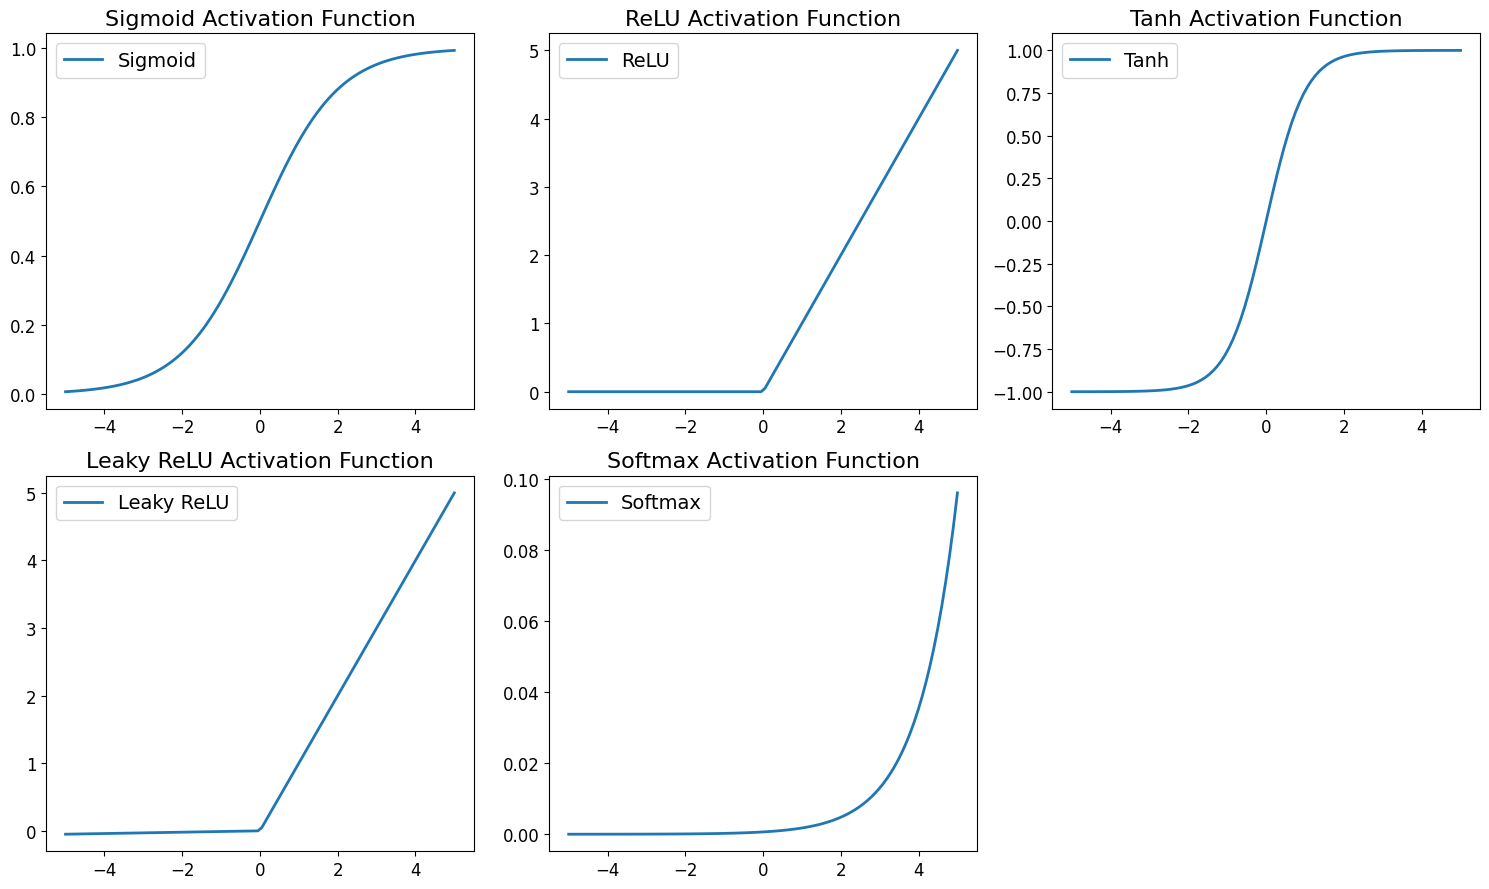

In [ ]:
Helper.run_pipeline()

### Batch Normalization

**Batch Normalization**: A technique to improve training speed, performance, and stability of neural networks by normalizing the inputs to each layer. It helps by maintaining the mean and variance of activations stable during training.

The formula for batch normalization is:

$$ \hat{x}^{(k)} = \frac{x^{(k)} - \mu_B^{(k)}}{\sqrt{\sigma_B^{(k)2} + \epsilon}} $$

Where:
- \( x^{(k)} \) is the \( k \)-th feature in the input batch.
- \( \mu_B^{(k)} \) is the mean of the \( k \)-th feature in the batch.
- \( \sigma_B^{(k)2} \) is the variance of the \( k \)-th feature in the batch.
- \( \epsilon \) is a small constant added for numerical stability.
- \( \hat{x}^{(k)} \) is the normalized value of the feature.

After normalization, a scale (\( \gamma \)) and shift (\( \beta \)) operation is typically applied:

$$ y^{(k)} = \gamma^{(k)} \hat{x}^{(k)} + \beta^{(k)} $$

Where:
- \( \gamma^{(k)} \) is the scaling factor.
- \( \beta^{(k)} \) is the shifting factor.
- \( y^{(k)} \) is the output after applying batch normalization.



### Dropout Regularization

A regularization technique where randomly selected neurons are ignored during training, preventing over-reliance on any single neuron

### Mnist Dataset with use case of activation functions testing, droupout regularization and  batch normalization

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization # We can use it later
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
class Utility:
    @staticmethod
    def split_and_normalize(data): # fashion_mnist.load_data() 
        (train_images, train_labels), (test_images, test_labels) = data 
        print("Data loaded and split successfully")
        train_images = train_images / 255.0  # For image normalization
        test_images = test_images / 255.0 # For image normalization
        print("The images are normalized")
        return train_images, test_images, train_labels, test_labels

    @staticmethod
    def visualize_data(train_images, train_labels):
        plt.figure(figsize=(10,10))
        for i in range(25):
            plt.subplot(5,5,i+1)
            plt.imshow(train_images[i], cmap=plt.cm.binary)
            plt.title(train_labels[i])
            plt.axis('off')
        plt.show();
        
    @staticmethod
    def model_creation(input_shape,output_shape,
                       neural_net_architecture = [128],
                       hidden_layers_activation_fn = 'relu',
                       ):
        model = Sequential() # Initialize the architecture of the network
        # input
        model.add(Flatten(input_shape = input_shape))
        # Hidden!!!!!
        for layer_neurons in neural_net_architecture:
            # model.add(layers.Dropout(0.5)) what will this do?
            model.add(Dense(layer_neurons, activation=hidden_layers_activation_fn))
            #model.add(BatchNormalization())
        # Output layer
        model.add(Dense(output_shape, activation='softmax'))
        print(model.summary())
        
        return model
    
    @staticmethod
    def model_compile_and_fit(model,
                              X_train, X_test, y_train, y_test,
                              optimizer = 'adam',
                              loss = 'sparse_categorical_crossentropy',
                              metrics = ['accuracy'],
                              n_of_epochs = 10,
                              batch_size = 32):
        
        model.compile(optimizer=optimizer, loss = loss, metrics = metrics)
        print("model compiled successfully")
        history = model.fit(X_train, y_train,
                            epochs=n_of_epochs,
                            batch_size = batch_size, 
                            validation_data=(X_test, y_test))
        print("Model is fit successfully")
        return model, history
        
    @staticmethod
    def evaluation_plot(model, history, X_test, y_test):
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
        print("\nTest accuracy:", test_acc)
        
        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.legend()
        plt.title('Accuracy Over Epochs')
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.legend()
        plt.title('Loss Over Epochs')
        plt.show()
        
    def predict_plot(model, X_test, y_test):
        predictions = model.predict(X_test)

        # Display a few test images and their predicted labels
        plt.figure(figsize=(10,10))
        for i in range(25):
            plt.subplot(5,5,i+1)
            plt.imshow(X_test[i], cmap=plt.cm.binary)
            predicted_label = np.argmax(predictions[i])
            true_label = y_test[i]
            if predicted_label == true_label:
                color = 'blue'
            else:
                color = 'red'
            plt.title(f"Pred: {predicted_label}, True: {true_label}", color=color)
            plt.axis('off')
        plt.show()

In [ ]:
class Helper:
    def run_pipeline(data = fashion_mnist.load_data(),
                     neural_net_architecture = [128,64],
                     hidden_layers_activation_fn = 'relu',
                     optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy',
                     metrics = ['accuracy'],
                     n_of_epochs = 10,
                     batch_size = 32):
        
        X_train, X_test, y_train, y_test = Utility.split_and_normalize(data)
        
        rows = X_train.shape[1] or X_test.shape[1]
        columns = X_train.shape[2] or X_test.shape[2]
        
        n_of_output_labels = len(np.unique(y_train)) or len(np.unique(y_test))
        
        model = Utility.model_creation(input_shape=(rows,columns),
                                       neural_net_architecture = neural_net_architecture,
                                       hidden_layers_activation_fn = hidden_layers_activation_fn,
                                       output_shape = n_of_output_labels)
        
        model, history = Utility.model_compile_and_fit(model = model,
                                                       X_train= X_train,
                                                       X_test= X_test,
                                                       y_train= y_train,
                                                       y_test= y_test,
                                                       optimizer= optimizer,
                                                       loss = loss,
                                                       metrics = metrics,
                                                       n_of_epochs = n_of_epochs,
                                                       batch_size=batch_size
                                                       )
        
        Utility.evaluation_plot(model=model, history=history, X_test= X_test, y_test= y_test)
        
        Utility.predict_plot(model = model, X_test= X_test, y_test= y_test)
        
        

Data loaded and split successfully
The images are normalized
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 64)                50240     
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
model compiled successfully
Epoch 1/50
938/938 [==============================] -

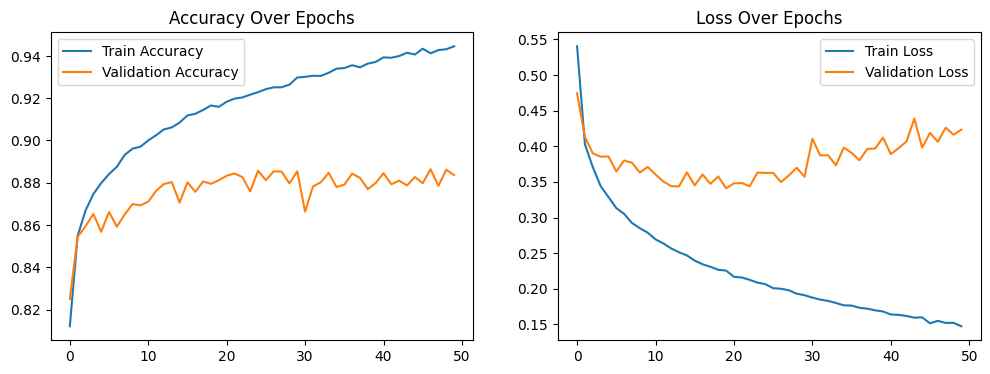

313/313 [==============================] - 1s 2ms/step


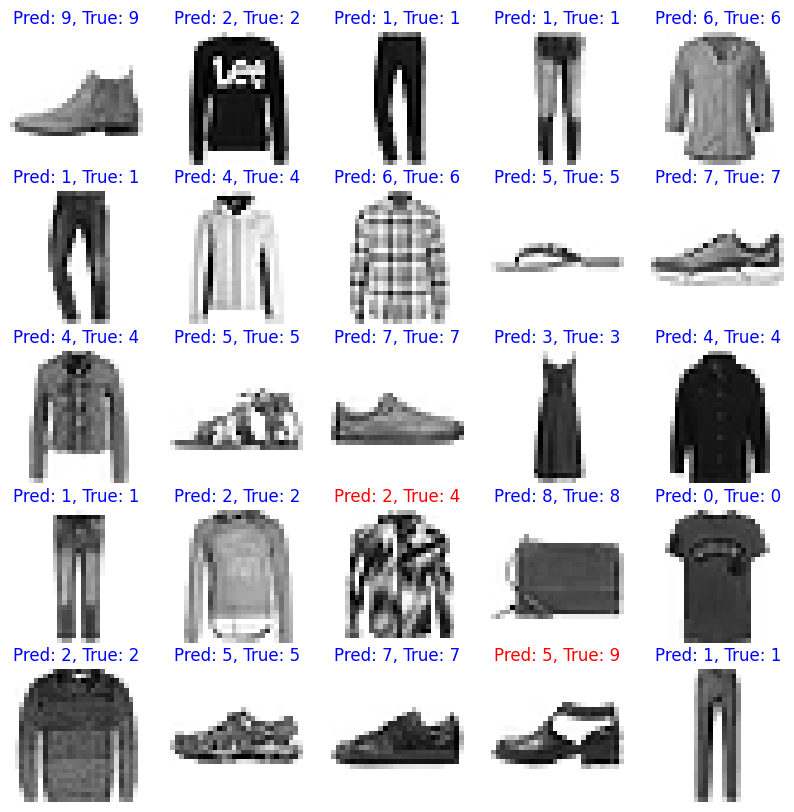

In [ ]:
Helper.run_pipeline(data = fashion_mnist.load_data(),
                    neural_net_architecture= [64, 32],
                    hidden_layers_activation_fn= 'leaky_relu',
                    batch_size = 64,
                    n_of_epochs = 50)

**Overfitting** occurs when a neural network learns the training data too closely, capturing noise and anomalies, which harms its performance on new data. It typically results from an overly complex model with too many parameters. 

On the other hand, **underfitting** means the model hasn't learned enough from the training data, possibly due to a model that's too simple.

To address these:
- Overfitting can be mitigated by regularization methods, reducing model complexity, or increasing the training data.
- Underfitting can usually be fixed by increasing model complexity, like adding more layers or neurons.

By analyzing our training and validation curves:
- If the training loss is much lower than the validation loss, it might indicate overfitting.
- If both training and validation losses are high, the model might be underfitting.


#### Another use case, evaluation of time for each activation function performance

Sigmoid Activation Function:
  Accuracy: 1.0000
  Training Time: 4.4628 seconds

Relu Activation Function:
  Accuracy: 0.8667
  Training Time: 4.2757 seconds

Tanh Activation Function:
  Accuracy: 0.9333
  Training Time: 4.3154 seconds

Softmax Activation Function:
  Accuracy: 0.9333
  Training Time: 3.6396 seconds

Leaky_relu Activation Function:
  Accuracy: 0.9667
  Training Time: 3.8892 seconds



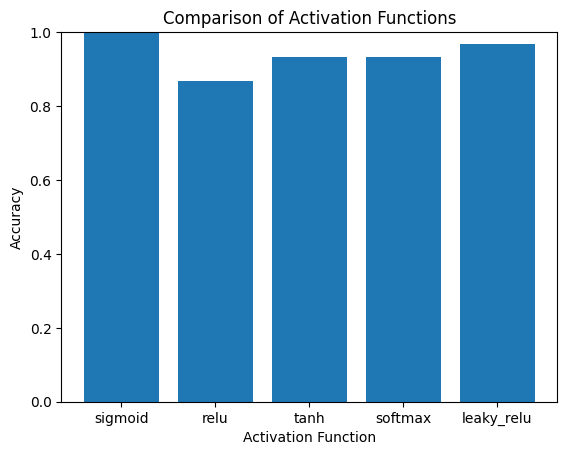

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# convert target labels to one-hot encoding
y_one_hot = to_categorical(y)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# define the activation functions to compare
activation_functions = ['sigmoid', 'relu', 'tanh', 'softmax','leaky_relu']

# initialize lists to store model accuracy and training time for each activation function
accuracies = []
training_times = []

# create and evaluate models with different activation functions
for activation in activation_functions:
  
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # start time 
    start_time = time.time()
    
    # train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)
    
    # end time
    end_time = time.time()
    
    # calculate the training time in seconds
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    
    print(f"{activation.capitalize()} Activation Function:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Training Time: {training_time:.4f} seconds\n")


plt.bar(activation_functions, accuracies)
plt.title('Comparison of Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


# Section Week 8: Hands-On CNN and Kaggle API

### Recap the last section example
Big Example:
- Given:
    - Input Shape: 256 x 256 x 3
- Conv1:
    - 64 Filter
    - Filter Shape 3 x 3
    - Strides = 2
    - Padding = 0
- Conv2:
    - 128 Filter
    - Filter Shape 3 x 3
    - Stride = 1
    - Padding = Same (Padding = (Filter Size - 1)/2 )
- Max Pooling:
    - 2 x 2
    - Stride = 2
- Conv3:
    - 256 Filter
    - Filter Shape 3 x 3
    - Stride = 1
    - Padding = Same
- Flatten Layer:
    - FC1: 500 Neuron
    - FC2: 10 Neuron

Rules:
- Output Shape = [(Ih + 2p - Fh)/S + 1] * [(Iw + 2p - Fw)/S + 1] * No of filters in layer
- No of Params in Conv Layer = (Kernelw x Kernelh x Input Channels +1) x No of filters in this layer
- No of Params in FC Layer = (No of Inputs + 1) x Number of hidden units in layer
Solution:
- Conv1 (Output Shape):
    - 127 x 127 x 64
- Conv1 (No of Param):
    - (3 x 3 x 3 + 1) x 64
- Conv2 (Output Shape):
    - 127 x 127 x 128
- Conv2 (No of Param):
    - (3 x 3 x 64 + 1) x 128
- Max Pooling (Output Shape):
    - 63 x 63 x 128
- Max Pooling (No of Params?):
    - NONE!!!!!!!!!!!
- Conv3 (Output Shape):
    - 63 x 63 x 256
- Conv3 (No of Params):
    - (3 x 3 x 128 + 1) x 256
- Flatten Output Shape:
    - 63 x 63 x 256
- FC1 (No of Params):
    - ( ... + 1 ) x 500
- FC2 (No of Params):
    - (500 + 1) x 10


## Get data through Kaggle API

- Login to Kaggle (if you want to use your personal account)
- Go to the dataset competition link and click join the competition https://www.kaggle.com/c/dogs-vs-cats/data
- Note: You will need to verify your profile using your number first
- Go and get your kaggle.json file of kaggle api from your profile settings
- Place it inside this folder
- Then run this notebook first

In [5]:
import os
import shutil
import kaggle
import zipfile
COMPETITION_ID = 'dogs-vs-cats' # Define the competition ID from kaggle
current_user_profile = os.path.expanduser("~")
kaggle_directory = os.path.join(current_user_profile, ".kaggle")
extract_dir = os.getcwd()
source_path = "kaggle.json"
destination_path = os.path.join(kaggle_directory, "kaggle.json")
shutil.copy(source_path, destination_path)

'C:\\Users\\Metwalli\\.kaggle\\kaggle.json'

In [ ]:
kaggle.api.authenticate()
kaggle.api.competition_download_files(COMPETITION_ID, path=extract_dir)

In [6]:
zip_file = '{}.zip'.format(COMPETITION_ID)

# Open and extract the ZIP file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    contents = zip_ref.namelist()
    zip_ref.extractall(extract_dir)
for i in contents:
    if i.endswith('.zip'):
        with zipfile.ZipFile(i, 'r') as zip_ref:
            contents = zip_ref.namelist()
            zip_ref.extractall(extract_dir)

print(f'The contents of {zip_file} have been extracted to {extract_dir}.')


The contents of dogs-vs-cats.zip have been extracted to a:\BRAND NEW START\Ongoing\Sep. 2024\Deep Learning.


## Building a CNN model from Scratch

<h3>Table of Contents<span class="tocSkip"></span></h3>
<div class="toc"><ul class="toc-item"><li><span><a href="#About-the-dataset-used-in-this-Lab:" data-toc-modified-id="About-the-dataset-used-in-this-Lab:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About the dataset used in this Lab:</a></span></li><li><span><a href="#What-is-the-aim-of-this-Lab?" data-toc-modified-id="What-is-the-aim-of-this-Lab?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is the aim of this Lab?</a></span></li><li><span><a href="#Create-a-small-dataset-using-the-training-folder-of-dogs-vs-cats-dataset" data-toc-modified-id="Create-a-small-dataset-using-the-training-folder-of-dogs-vs-cats-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create a small dataset using the training folder of dogs-vs-cats dataset</a></span></li><li><span><a href="#Building-our-own-CNN" data-toc-modified-id="Building-our-own-CNN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building our own CNN</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fit the model</a></span></li><li><span><a href="#Save-our-model-(Convnet-from-scratch)" data-toc-modified-id="Save-our-model-(Convnet-from-scratch)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save our model (Convnet from scratch)</a></span></li><li><span><a href="#Plot-the-Loss-and-accuracy-of-both-the-training-and-validation-data" data-toc-modified-id="Plot-the-Loss-and-accuracy-of-both-the-training-and-validation-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot the Loss and accuracy of both the training and validation data</a></span></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Data Augmentation</a></span><ul class="toc-item"><li><span><a href="#Displaying-some-randomly-augmented-training-images" data-toc-modified-id="Displaying-some-randomly-augmented-training-images-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Displaying some randomly augmented training images</a></span></li></ul></li><li><span><a href="#Defining-a-new-convnet-that-includes-dropout" data-toc-modified-id="Defining-a-new-convnet-that-includes-dropout-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Defining a new convnet that includes dropout</a></span><ul class="toc-item"><li><span><a href="#Train-the-network-using-data-augmentation-and-dropout." data-toc-modified-id="Train-the-network-using-data-augmentation-and-dropout.-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Train the network using data augmentation and dropout.</a></span></li><li><span><a href="#Save-the-model-(Convnet-built-with-dropout-and-the-data-is-augmanted)" data-toc-modified-id="Save-the-model-(Convnet-built-with-dropout-and-the-data-is-augmanted)-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Save the model (Convnet built with dropout and the data is augmanted)</a></span></li><li><span><a href="#Plot-the-Loss-and-accuracy-of-both-the-training-and-validation-data¶" data-toc-modified-id="Plot-the-Loss-and-accuracy-of-both-the-training-and-validation-data¶-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Plot the Loss and accuracy of both the training and validation data¶</a></span></li></ul></li></ul></div>

### Dataset Origination

#### About the dataset used in this Lab:

- The training archive contains 25,000 images of dogs and cats. 
-  We will create a small dataset (from the tranining archive of the dataset above) containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training—1,000 for validation, and1,000 for testing.

## What is the aim of this Lab?

- The aim is to build a CNN from scratch using a small dataset and then see the performance of our CNN and how can we reach better performance

- The lab is divided into <b>2 sections</b>
    - <font color = 'green'> <b>The first section is building a basic convnet </font> </b>
    - <font color = 'green'> <b> The second section is using data agumnetation and dropout to overcome overfiting in our previously trained convnet </font> </b>
    

# WHY CNN !!!!!!!!!?????

- They can reduce the amount of input data to the ANN network
- They tolerate the shifting of the image data (whether up,down,left or right)
- They make use of the correlation between pixels and other statistical insights!!!!

!['CNN/CNN.png'](CNN/CNN.png)

## Create a small dataset using the training folder of dogs-vs-cats dataset 

In [ ]:
import os, shutil, cv2

In [2]:
"""In this cell, for some demo, 
I am going to have 1000 image for training,
500 for val. and 500 for testing. """

def create_dir_structure(base_dir, subdirs):
    """Creates directory structure for train, validation, and test datasets."""
    for subdir in subdirs:
        os.makedirs(subdir, exist_ok=True)

def copy_files(original_dir, target_dir, file_pattern, start_index, end_index):
    """Copies files from the original directory to the target directory."""
    fnames = [file_pattern.format(i) for i in range(start_index, end_index)]
    for fname in fnames:
        src = os.path.join(original_dir, fname)
        dst = os.path.join(target_dir, fname)
        shutil.copyfile(src, dst)

# Paths setup
base_dir = os.getcwd()
original_dataset_dir = os.path.join(base_dir, 'train')

train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'testing')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

# Create directory structure
create_dir_structure(base_dir, [
    train_dir, validation_dir, test_dir,
    train_cats_dir, train_dogs_dir,
    validation_cats_dir, validation_dogs_dir,
    test_cats_dir, test_dogs_dir
])

# File copying
copy_files(original_dataset_dir, train_cats_dir, 'cat.{}.jpg', 0, 1000)
copy_files(original_dataset_dir, validation_cats_dir, 'cat.{}.jpg', 1000, 1500)
copy_files(original_dataset_dir, test_cats_dir, 'cat.{}.jpg', 1500, 2000)

copy_files(original_dataset_dir, train_dogs_dir, 'dog.{}.jpg', 0, 1000)
copy_files(original_dataset_dir, validation_dogs_dir, 'dog.{}.jpg', 1000, 1500)
copy_files(original_dataset_dir, test_dogs_dir, 'dog.{}.jpg', 1500, 2000)


So you do indeed have 2,000 training images, 1,000 validation images, and 1,000 testimages. Each split contains the same number of samples from each class: this is a <font color = red> balanced binary-classification problem <font>, which means classification accuracy will be inappropriate measure of success. 

In [20]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print("-----------------------------------------------------------")
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print("-----------------------------------------------------------")
print('total Testing cat images:', len(os.listdir(test_cats_dir)))
print('total Testing dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
-----------------------------------------------------------
total validation cat images: 500
total validation dog images: 500
-----------------------------------------------------------
total Testing cat images: 500
total Testing dog images: 500


## Building our own CNN

<font color = red> <b>NOTE: </b> </font> The depth of the feature maps progressively increases in the network
(from 32 to 128), whereas the size of the feature maps decreases (from 148 ×
148 to 7 × 7). This is a pattern you’ll see in almost all convnets.

In [ ]:
from keras import layers, models

model = models.Sequential() #Linear stack of layers where each layer has exactly one input tensor and one output tensor

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) #It has 32 filters, each with a kernel size of 3x3
model.add(layers.MaxPooling2D((2, 2))) #Max pooling reduces the spatial dimensions (width and height) of the input volume for the next convolutional layer.
#Current feature map is 150-3+1 = 148
#After max pooling (2,2) now next input 148/2 = 74

model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
#Feature map reduced to 72 corresponding to (74-3+1)
#After max pooling (2,2) now next input is 72/2 = 36

model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
#Feature map reduced to 29 corresponding to (36-3+1)
#After max pooling (2,2) now next input is 34/2 = 17

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#Feature map reduced to 13 corresponding to (17-3+1)
#After max pooling (2,2) now next input is 15/2 = 7

#Flatenned input is 7*7*128
model.add(layers.Flatten()) #The flatten layer converts the 3D output of the last pooling layer into a 1D tensor 
#to prepare it for the dense (fully connected) layers.

model.add(layers.Dense(512, activation='relu')) #This is a fully connected layer with 512 neurons and ReLU activation. 
#Dense layers are used for learning non-linear combinations of the high-level features extracted by the convolutional layers.

model.add(layers.Dense(1, activation='sigmoid'))
#This is the output layer with a single neuron and sigmoid activation, suitable for binary classification tasks.

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

For the compilation step, you’ll go with the RMSprop optimizer, as usual. Because you
ended the network with a single sigmoid unit, you’ll use binary crossentropy as the
loss

In [18]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

 <font color = 'red'> Until now, We have just build the architecture for our convnet. Let's prepare our data to fed it in our convnet  </font>

## Data preprocessing

Data should be formatted into floating point tensors before being fed into the network, so the steps for getting it into the network are as follows:

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, that can automatically turn image files on disk into batches of preprocessed tensors. 

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Resizes all images to 150 × 150, 
#class_mode binary: Because we use binary_crossentropy loss, we need binary labels.
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, 
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s look at the output of one of these generators: it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). There are 20 samples in each batch (the batch size).

Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point:

In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Fit the model

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 52s 480ms/step - loss: 0.6909 - acc: 0.5285 - val_loss: 0.6693 - val_acc: 0.6140
Epoch 2/30
100/100 [==============================] - 39s 389ms/step - loss: 0.6612 - acc: 0.6070 - val_loss: 0.6476 - val_acc: 0.5990
Epoch 3/30
100/100 [==============================] - 39s 392ms/step - loss: 0.6164 - acc: 0.6605 - val_loss: 0.6146 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 39s 388ms/step - loss: 0.5711 - acc: 0.7040 - val_loss: 0.5836 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 38s 382ms/step - loss: 0.5384 - acc: 0.7170 - val_loss: 0.5713 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 40s 401ms/step - loss: 0.5194 - acc: 0.7415 - val_loss: 0.5614 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 40s 397ms/step - loss: 0.4898 - acc: 0.7575 - val_loss: 0.5907 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 3

## Save our model (Convnet from scratch)

In [ ]:
# It’s good practice to always save your models after training.
model.save('cats_and_dogs_small_1.h5')

## Plot the Loss and accuracy of both the training and validation data 

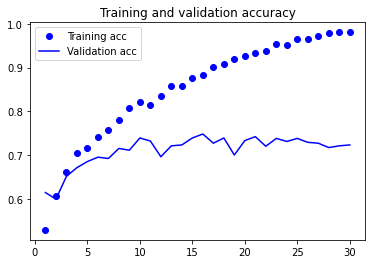

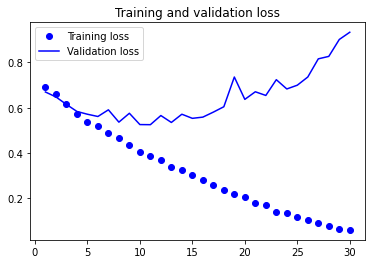

In [ ]:
# Let’s plot the loss and accuracy of the model over the training and validation data during training 

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<b> These plots are characteristic of overfitting. </b>

The training accuracy increases linearly over time, until it reaches nearly 100%, 

whereas the validation accuracy stalls at 70–72%.

The validation loss reaches its minimum after only five epochs and then stalls, whereas
the training loss keeps decreasing linearly until it reaches nearly 0.

Because you have relatively few training samples (2,000), overfitting will be your number-one concern. 


There is a number of techniques that can help <b> mitigate overfitting </b>, 
such as <b> dropout and weight decay (L2 regularization) </b>. 

We’re going to work with a one, specific to computer vision and used almost universally
when processing images with deep-learning models: <font color = red> <b> data augmentation </b> </font>. 

<font color = 'purple'> Section 2: Mitigate overfitting for our convnet by data augmentation & dropout </font>

## Data Augmentation

In [25]:
from keras.preprocessing.image import ImageDataGenerator
import os

datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

### Displaying some randomly augmented training images

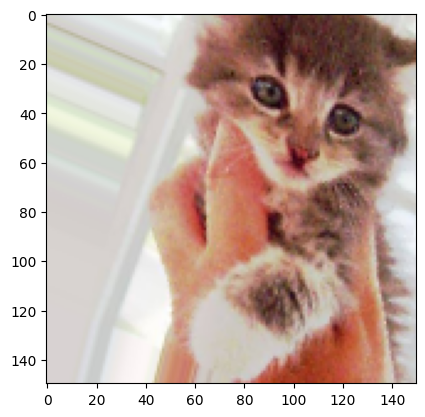

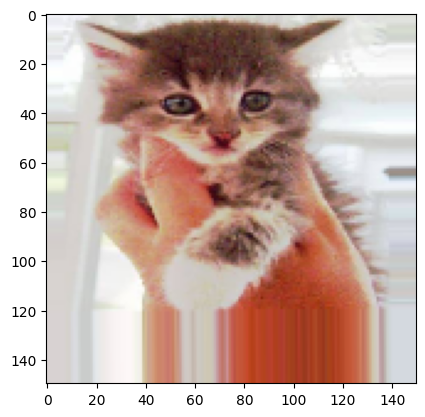

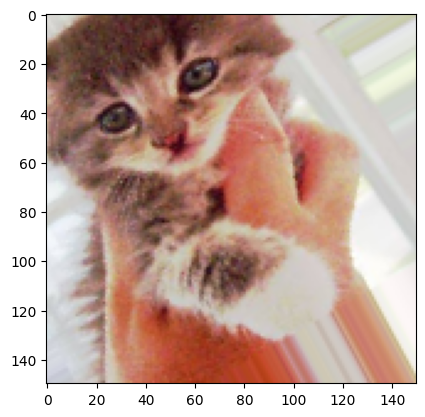

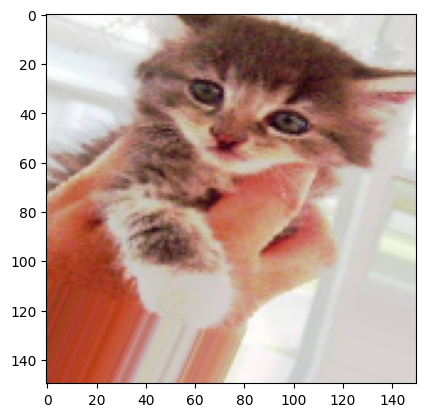

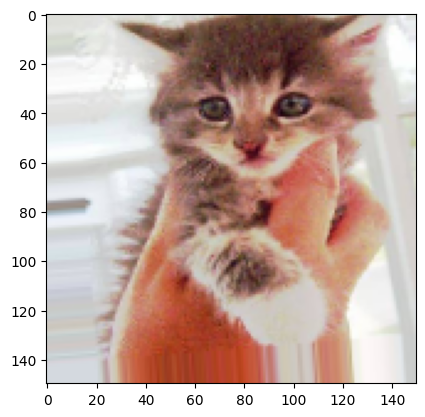

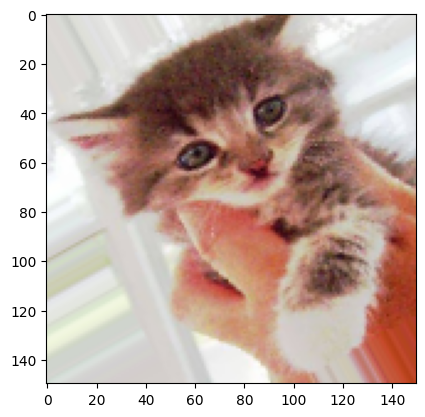

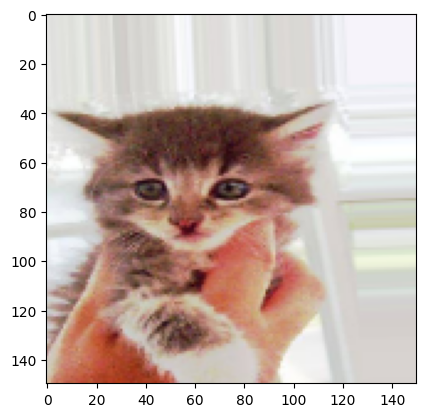

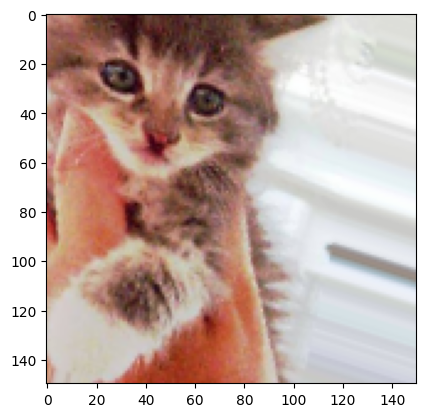

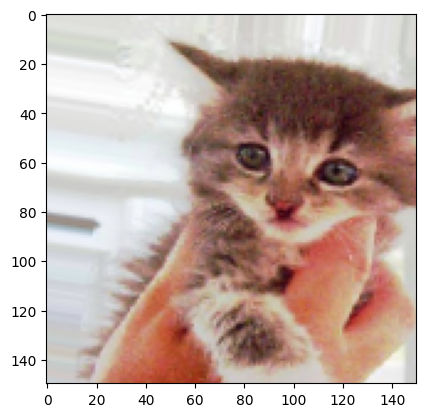

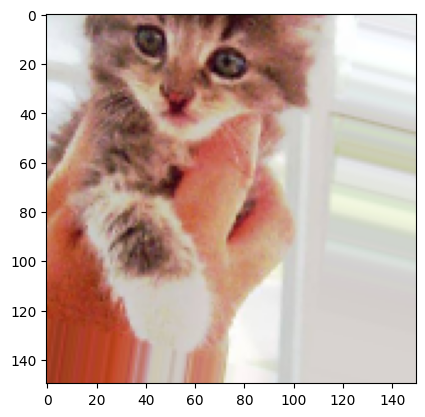

In [26]:
# from keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Chooses one image to augment
img_path = fnames[3]

# Reads the image and resizes it
img = tf.keras.utils.load_img(img_path, target_size=(150, 150))

# x = image.img_to_array(img)
x = tf.keras.utils.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0

# Generates batches of randomly transformed images. Loops indefinitely, so you need to break the 
# loop at some point!
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 10 == 0:
        break
plt.show()

If you train a new network using this data-augmentation configuration, the network
will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images—you can’t produce new information, you can only remix existing information. 

This may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also add a <font color = red> <b> Dropout layer to your model </b> </font>, right before the densely connected classifier.

## Defining a new convnet that includes dropout

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

# Dropout Layer before fully connected 
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['acc'])

### Train the network using data augmentation and dropout.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='binary')

history = model.fit(
            train_generator,
            steps_per_epoch=50,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=31)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
50/50 [==============================] - 35s 686ms/step - loss: 0.6958 - acc: 0.4918 - val_loss: 0.6916 - val_acc: 0.5010
Epoch 2/100
50/50 [==============================] - 34s 686ms/step - loss: 0.6867 - acc: 0.5404 - val_loss: 0.6912 - val_acc: 0.5242
Epoch 3/100
50/50 [==============================] - 34s 688ms/step - loss: 0.6823 - acc: 0.5625 - val_loss: 0.6807 - val_acc: 0.5363
Epoch 4/100
50/50 [==============================] - 34s 682ms/step - loss: 0.6816 - acc: 0.5556 - val_loss: 0.6661 - val_acc: 0.5907
Epoch 5/100
50/50 [==============================] - 35s 691ms/step - loss: 0.6744 - acc: 0.5681 - val_loss: 0.6675 - val_acc: 0.5746
Epoch 6/100
50/50 [==============================] - 35s 689ms/step - loss: 0.6717 - acc: 0.5888 - val_loss: 0.6433 - val_acc: 0.6341
Epoch 7/100
50/50 [==============================] - 35s 691ms/step - loss: 0.6529 - acc: 0.6136 - val_loss: 0.6

### Save the model (Convnet built with dropout and the data is augmanted)

In [ ]:
# Lets save the model
model.save('cats_and_dogs_small_2.h5')

### Plot the Loss and accuracy of both the training and validation data¶

In [15]:
import keras

keras.__version__

'2.15.0'

range(1, 101)
100


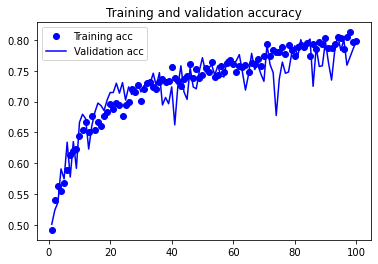

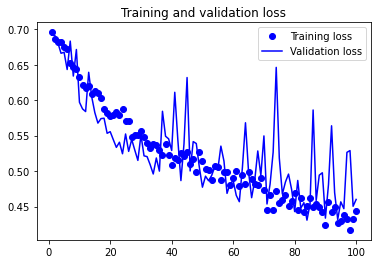

In [ ]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
print(epochs)
print(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 3s 64ms/step - loss: 0.4828 - acc: 0.7860
test acc: 0.7860000133514404


The above plotting show that the accuracy increase from 71% to 80% , also we have overcome the overfitting , and this was achieved by adding a dropout before the FC Layers and data augmentation.

To have better performance let's use the pretrained VGG-16 in the next lab: pretrained convnet

# PRETRAINED MODELS CNN SECTION 10

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab-CNN-part-2:-Using-a-pretrained-convnet" data-toc-modified-id="Lab-CNN-part-2:-Using-a-pretrained-convnet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lab CNN part 2: Using a pretrained convnet</a></span></li><li><span><a href="#-Section-1:-Feature-extraction-" data-toc-modified-id="-Section-1:-Feature-extraction--2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font color="purple"> Section 1: Feature extraction </font></a></span><ul class="toc-item"><li><span><a href="#Instantiating-the--VGG16--convolutional-base" data-toc-modified-id="Instantiating-the--VGG16--convolutional-base-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Instantiating the <font color="red"> VGG16 </font> convolutional base</a></span><ul class="toc-item"><li><span><a href="#-Option-1:-Extracting-features-using-the-pretrained-convolutional-base-" data-toc-modified-id="-Option-1:-Extracting-features-using-the-pretrained-convolutional-base--2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span><font color="#F57A07"> Option 1: Extracting features using the pretrained convolutional base </font></a></span></li><li><span><a href="#-Option-2:--Adding-a-densely-connected-classifier-on-top-of-the-convolutional-base-(Training-the-model-end-to-end-with-a-frozen-convolutional-base)-" data-toc-modified-id="-Option-2:--Adding-a-densely-connected-classifier-on-top-of-the-convolutional-base-(Training-the-model-end-to-end-with-a-frozen-convolutional-base)--2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span><font color="F57A07"> Option 2:  Adding a densely connected classifier on top of the convolutional base (Training the model end to end with a frozen convolutional base) </font></a></span></li><li><span><a href="#Training-the-model-end-to-end-with-a-frozen-convolutional-base" data-toc-modified-id="Training-the-model-end-to-end-with-a-frozen-convolutional-base-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Training the model end to end with a frozen convolutional base</a></span></li></ul></li></ul></li><li><span><a href="#-Section-2:-Fine-Tuning-" data-toc-modified-id="-Section-2:-Fine-Tuning--3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font color="purple"> Section 2: Fine Tuning </font></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Freezing-all-layers-up-to-a-specific-one" data-toc-modified-id="Freezing-all-layers-up-to-a-specific-one-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Freezing all layers up to a specific one</a></span></li></ul></li></ul></li></ul></div>

# Lab CNN part 2: Using a pretrained convnet

A common and highly effective approach to deep learning on small image datasets is
to use a pretrained network.

A pretrained network is a saved network that was previously trained on a large dataset

There are two ways to use a pretrained network: <font color = red > feature extraction and fine-tuning. </font>
We’ll cover both of them. Let’s start with feature extraction.

# <font color = 'purple'> Section 1: Feature extraction </font>

Feature extraction consists of using the representations learned by a previous network
to extract interesting features from new samples. These features are then run through
a new classifier, which is trained from scratch.

 As you saw previously, convnets used for image classification comprise two parts:
 
- they start with a series of pooling and convolution layers, 
- and they end with a densely connected classifier. 

The first part is called the convolutional base of the model. In the case of convnets, feature extraction consists of taking the convolutional base of a previously trained network, running the new data through it, and training a new classifier on top of the output

![image.png](attachment:image.png)

##  Instantiating the <font color = red> VGG16 </font> convolutional base

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

The final feature map has shape (4, 4, 512). That’s the feature on top of which you’ll
stick a densely connected classifier.

<b> At this point, there are two ways you could proceed: </b>

- Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier similar. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, this technique won’t allow you to use data augmentation.

- Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to usedata augmentation, because every input image goes through the convolutional base every time it’s seen by the model. But for the same reason, this technique is far more expensive than the first.

### <font color = '#F57A07'> Option 1: Extracting features using the pretrained convolutional base </font>
#####  <font color = '#F57A07'> FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION </font>

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = '' 
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'testing')

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                directory,
                target_size=(150, 150),
                batch_size=batch_size,
                class_mode='binary')
    
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        # Note that because generators yield data indefinitely in a loop, you must break after every
         #image has been seen once.
        if i * batch_size >= sample_count:
            break
    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 655ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 682ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 701ms/step


The extracted features are currently of shape (samples, 4, 4, 512). You’ll feed them
to a densely connected classifier, so first you must flatten them to (samples, 8192):

In [ ]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

At this point, you can define your densely connected classifier (note the use of dropout for regularization) and train it on the data and labels that you just recorded.

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_features, train_labels,
                epochs=30,
                batch_size=20,
                validation_data=(validation_features, validation_labels))

Epoch 1/30


100/100 [==============================] - 3s 14ms/step - loss: 0.5940 - acc: 0.6800 - val_loss: 0.4306 - val_acc: 0.8450
Epoch 2/30
100/100 [==============================] - 1s 11ms/step - loss: 0.4301 - acc: 0.8065 - val_loss: 0.3484 - val_acc: 0.8780
Epoch 3/30
100/100 [==============================] - 1s 11ms/step - loss: 0.3351 - acc: 0.8685 - val_loss: 0.3068 - val_acc: 0.8920
Epoch 4/30
100/100 [==============================] - 1s 11ms/step - loss: 0.2971 - acc: 0.8820 - val_loss: 0.2940 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 1s 11ms/step - loss: 0.2860 - acc: 0.8800 - val_loss: 0.2753 - val_acc: 0.8970
Epoch 6/30
100/100 [==============================] - 1s 12ms/step - loss: 0.2622 - acc: 0.8975 - val_loss: 0.2667 - val_acc: 0.8970
Epoch 7/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2472 - acc: 0.9000 - val_loss: 0.2601 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 1s 9ms/step -

Training is very fast, because you only have to deal with two Dense layers—an epoch
takes less than one second even on CPU.

Let’s look at the loss and accuracy curves during training 

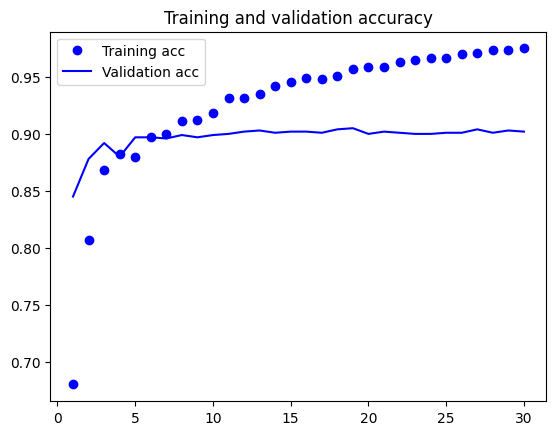

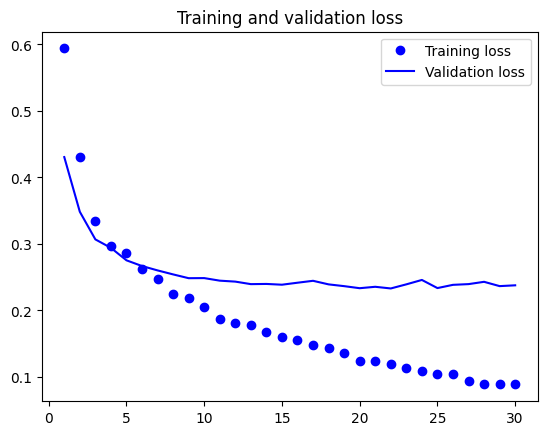

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### <font color = 'F57A07'> Option 2:  Adding a densely connected classifier on top of the convolutional base (Training the model end to end with a frozen convolutional base) </font>

#####  <font color = 'F57A07'> FEATURE EXTRACTION WITH DATA AUGMENTATION </font>

In [ ]:
# Because models behave just like layers, you can add a model (like conv_base) to a
# Sequential model just like you would add a layer.

from keras import models
from keras import layers

model_2 = models.Sequential()

conv_base.trainable = False # Freeze the conv base

model_2.add(conv_base)

model_2.add(layers.Flatten())

model_2.add(layers.Dense(256, activation='relu'))

model_2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


As you can see, the convolutional base of VGG16 has 14,714,688 parameters, which is
very large. 

The classifier you’re adding on top has 2 million parameters.

Before you compile and train the model, it’s very important to <font color = red> freeze </font> the convolutional base. Freezing a layer or set of layers means preventing their weights from being
updated during training. 

If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because
the Dense layers on top are randomly initialized, very large weight updates would be
propagated through the network, effectively destroying the representations previously
learned.

<font color = red> In Keras, you freeze a network by setting its trainable attribute to False </font>

In [ ]:
# only the weights from the two Dense layers that you added will be trained. 
# That’s a total of four weight tensors: two per layer (the main weight matrix and the bias vector).



print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


 ### Training the model end to end with a frozen convolutional base

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150), 
                        batch_size=20,
                        class_mode='binary')

model_2.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=2e-5),
                metrics=['acc'])

history = model_2.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 101s 995ms/step - loss: 0.5987 - acc: 0.6880 - val_loss: 0.4428 - val_acc: 0.8200
Epoch 2/30
100/100 [==============================] - 104s 1s/step - loss: 0.4731 - acc: 0.7850 - val_loss: 0.3603 - val_acc: 0.8600
Epoch 3/30
100/100 [==============================] - 104s 1s/step - loss: 0.4293 - acc: 0.8135 - val_loss: 0.3355 - val_acc: 0.8700
Epoch 4/30
100/100 [==============================] - 104s 1s/step - loss: 0.4003 - acc: 0.8220 - val_loss: 0.2961 - val_acc: 0.8860
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.3860 - acc: 0.8330 - val_loss: 0.2874 - val_acc: 0.8790
Epoch 6/30
100/100 [==============================] - 104s 1s/step - loss: 0.3627 - acc: 0.8465 - val_loss: 0.2764 - val_acc: 0.8840
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.3547 - acc: 0.8475 - val_loss: 0.2643 

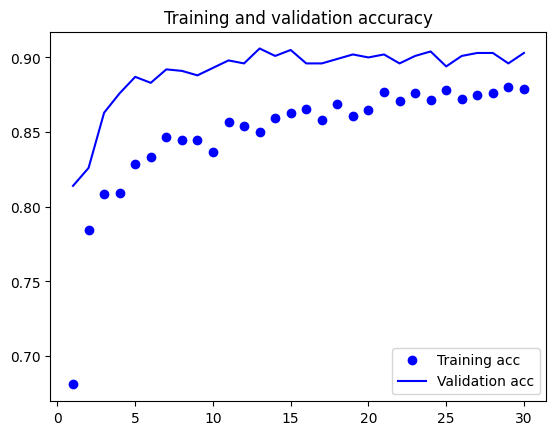

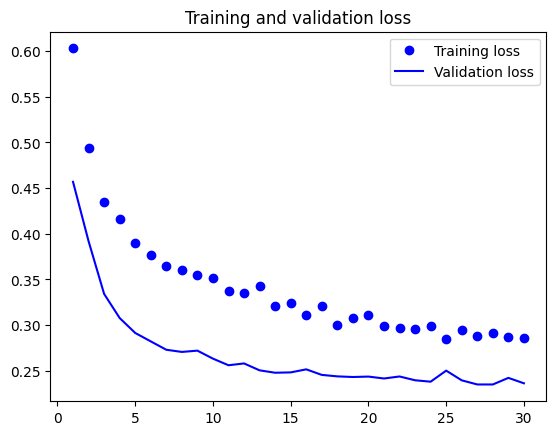

In [ ]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# test_loss, test_acc = model.evaluate(test_generator, steps=50)

# print('test acc:', test_acc)

# <font color = 'purple'> Section 2: Fine Tuning (2nd Option) </font>

Another widely used technique for model reuse, complementary to feature
extraction, is fine-tuning (see figure 5.19). Fine-tuning consists of unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more relevant for the problem 

###  Freezing all layers up to a specific one

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':    # write the block you want to train
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(learning_rate=1e-5), # Choose reasonable learning rate
            metrics=['acc'])

history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/100
100/100 [==============================] - 130s 1s/step - loss: 0.3315 - acc: 0.8525 - val_loss: 0.2252 - val_acc: 0.9010
Epoch 2/100
100/100 [==============================] - 128s 1s/step - loss: 0.3025 - acc: 0.8650 - val_loss: 0.2347 - val_acc: 0.9020
Epoch 3/100
100/100 [==============================] - 129s 1s/step - loss: 0.2518 - acc: 0.9020 - val_loss: 0.2044 - val_acc: 0.9210
Epoch 4/100
100/100 [==============================] - 128s 1s/step - loss: 0.2411 - acc: 0.8980 - val_loss: 0.1807 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 128s 1s/step - loss: 0.2160 - acc: 0.9150 - val_loss: 0.1827 - val_acc: 0.9200
Epoch 6/100
100/100 [==============================] - 129s 1s/step - loss: 0.2148 - acc: 0.9000 - val_loss: 0.1788 - val_acc: 0.9280
Epoch 7/100
100/100 [==============================] - 134s 1s/step - loss: 0.2114 - acc: 0.9130 - val_loss: 0.1725 - val_acc: 0.9230
Epoch 8/100
100/100 [==============================] - 128s 1s

Epoch 62/100
100/100 [==============================] - 124s 1s/step - loss: 0.0317 - acc: 0.9895 - val_loss: 0.2730 - val_acc: 0.9300
Epoch 63/100
100/100 [==============================] - 124s 1s/step - loss: 0.0343 - acc: 0.9875 - val_loss: 0.2403 - val_acc: 0.9390
Epoch 64/100
100/100 [==============================] - 124s 1s/step - loss: 0.0240 - acc: 0.9905 - val_loss: 0.2233 - val_acc: 0.9410
Epoch 65/100
100/100 [==============================] - 125s 1s/step - loss: 0.0356 - acc: 0.9865 - val_loss: 0.2870 - val_acc: 0.9320
Epoch 66/100
100/100 [==============================] - 124s 1s/step - loss: 0.0394 - acc: 0.9830 - val_loss: 0.2639 - val_acc: 0.9290
Epoch 67/100
100/100 [==============================] - 124s 1s/step - loss: 0.0326 - acc: 0.9870 - val_loss: 0.2064 - val_acc: 0.9400
Epoch 68/100
100/100 [==============================] - 124s 1s/step - loss: 0.0416 - acc: 0.9875 - val_loss: 0.2549 - val_acc: 0.9350
Epoch 69/100
100/100 [==============================] -

In [ ]:
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 41s 826ms/step - loss: 0.3578 - acc: 0.9370
test acc: 0.9369999766349792


# Recurrent Neural Network (RNN)!!

## [Click here to view RNN Solved Example!](RNN_Example_solved.pdf)
## [Click here to view RNN Cheatsheet (First 2 pages only!)](RNN_Cheatsheet.pdf)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Understanding-RNN" data-toc-modified-id="Understanding-RNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Understanding RNN</a></span></li><li><span><a href="#Step-1:-Import-Libraries" data-toc-modified-id="Step-1:-Import-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 1: Import Libraries</a></span></li><li><span><a href="#Prepare-the--data" data-toc-modified-id="Prepare-the--data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare the  data</a></span><ul class="toc-item"><li><span><a href="#Set-the-vocabulary-size-and-load-in-training-and-test-data" data-toc-modified-id="Set-the-vocabulary-size-and-load-in-training-and-test-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Set the vocabulary size and load in training and test data</a></span></li><li><span><a href="#Inspect-a-sample-review-and-its-label" data-toc-modified-id="Inspect-a-sample-review-and-its-label-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Inspect a sample review and its label</a></span></li><li><span><a href="#Maximum-review-length-and-minimum-review-length" data-toc-modified-id="Maximum-review-length-and-minimum-review-length-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Maximum review length and minimum review length</a></span></li><li><span><a href="#Pad-sequences" data-toc-modified-id="Pad-sequences-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Pad sequences</a></span></li></ul></li><li><span><a href="#Build-the-RNN-model" data-toc-modified-id="Build-the-RNN-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build the RNN model</a></span></li><li><span><a href="#Train-and-evaluate-our-model" data-toc-modified-id="Train-and-evaluate-our-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train and evaluate our model</a></span></li><li><span><a href="#Test-the-model" data-toc-modified-id="Test-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test the model</a></span></li></ul></div>

## Understanding RNN

<img src = 1.PNG>

<img src = 2.PNG>

<img src = 3.PNG>

<img src = 4.PNG>

<img src = 6.jpeg>

## Step 1: Import Libraries 

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

## Prepare the  data

### Set the vocabulary size and load in training and test data

In [ ]:
vocabulary_size = 50000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


### Inspect a sample review and its label

In [ ]:
print("------------------Review-----------------")
print(X_train[2])
print("------------------Label-----------------")
print(y_train[2])

------------------Review-----------------
[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 44076, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
------------------Label-----------------
0


- The review is stored as a sequence of integers. These are word IDs that have been pre-assigned to individual words.
- The label is an integer (0 for negative, 1 for positive).

In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('-----------------Review with words----------------------')
print([id2word.get(i, ' ') for i in X_train[6]])
print('-----------------Label----------------------')
print(y_train[2])

-----------------Review with words----------------------
['the', 'boiled', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'murdering', 'naschy', 'br', 'villain', 'council', 'suggestion', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'echoed', 'concentrates', 'concept', 'issue', 'skeptical', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'rocketed', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', "captain's", 'starship', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'originals', 'things', 'is', 'far', 'this', 'make', 'mistakes', "kevin's", 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'dose', 'movies', 'get', 'are', 'and', 'br', 'yes', 

### Maximum review length and minimum review length

In [ ]:
print('Maximum review length: {}'.format(len(max((X_train + X_test), key=len))))
print('Minimum review length: {}'.format(len(min((X_test + X_test), key=len))))

Maximum review length: 2697
Minimum review length: 14


### Pad sequences

In [ ]:
from tensorflow.keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

## Build the RNN model

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, SimpleRNNCell
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
#model.add(GRU(100))
#model.add(RNN(SimpleRNNCell(100)))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           1600000   
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,653,301
Trainable params: 1,653,301
Non-trainable params: 0
_________________________________________________________________
None


## Train and evaluate our model

In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
390/390 [==============================] - 274s 697ms/step - loss: 0.4320 - accuracy: 0.7935 - val_loss: 0.2237 - val_accuracy: 0.9219
Epoch 2/3
390/390 [==============================] - 293s 753ms/step - loss: 0.2872 - accuracy: 0.8779 - val_loss: 0.1365 - val_accuracy: 0.9531
Epoch 3/3
390/390 [==============================] - 308s 789ms/step - loss: 0.1604 - accuracy: 0.9424 - val_loss: 0.2089 - val_accuracy: 0.9062


## Test the model

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.870199978351593
